In [1]:
#主成分分析
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [2]:
X = np.random.randn(1000,3)
print(X.shape)
print(X)

(1000, 3)
[[-1.591805    1.50759007 -0.61224833]
 [ 0.75926012 -0.25302295 -0.75595423]
 [-0.31079089  0.20138589 -1.3320763 ]
 ...
 [-1.99625601 -2.08728932 -0.11416405]
 [ 0.62132918  0.77454216  0.59202468]
 [ 0.30830534 -1.24351185 -0.49892493]]


In [3]:
#使用PCA进行降维，将3维数据降维为2维
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print(X_pca)

[[-1.54683289  0.38000126]
 [ 0.97663117 -0.36590086]
 [ 0.08254699 -0.63958705]
 ...
 [-1.51890224 -2.32768411]
 [ 0.26604511  1.11646637]
 [ 0.6287844  -1.15325011]]


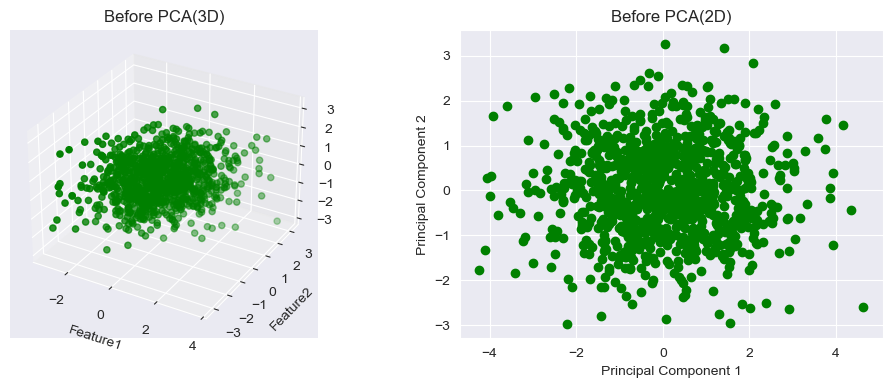

In [14]:
#可视化

#转换前的3维数据可视化
# 创建一个新的图形窗口，设置画布尺寸为12英寸（宽）×4英寸（高）
# figsize参数控制图形的物理大小，适合需要横向对比子图的场景
fig = plt.figure(figsize=(12,4))

# 在画布上创建第一个子图（1行2列网格中的第1个位置），并指定为3D投影
# 121表示1行2列的第1个子图，projection='3d'启用三维坐标系
ax1 = fig.add_subplot(121,projection='3d')
# 在ax1子图中绘制3D散点图：
# X[:,0]表示取所有行的第0列作为x轴数据
# X[:,1]表示取所有行的第1列作为y轴数据
# X[:,2]表示取所有行的第2列作为z轴数据
# c='g'设置散点颜色为绿色（green的缩写）
ax1.scatter(X[:,0],X[:,1],X[:,2],c='g')
# 设置子图标题为'Before PCA(3D)'，表示这是PCA降维前的三维原始数据
ax1.set_title('Before PCA(3D)')
ax1.set_xlabel('Feature1')
ax1.set_ylabel('Feature2')

#转化后的2维数据可视化
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
# 在画布上创建第一个子图（1行2列网格中的第1个位置）
# 121表示1行2列的第2个子图，projection='3d'启用二维坐标系
ax1 = fig.add_subplot(122)
# 在ax1子图中绘制3D散点图：
# X[:,0]表示取所有行的第0列作为x轴数据
# X[:,1]表示取所有行的第1列作为y轴数据
# c='g'设置散点颜色为绿色（green的缩写）
ax1.scatter(X_pca[:,0],X_pca[:,1],c='g')
# 设置子图标题为'Before PCA(3D)'，表示这是PCA降维前的三维原始数据
ax1.set_title('Before PCA(2D)')
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
plt.show()


In [16]:
#手动构建线性相关的三组特征数据

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
n_samples = 1000
#第1个主成分方向
component1 = np.random.normal(0,1,n_samples)
#第2个主成分方向
component2 = np.random.normal(0,0.2,n_samples)
#第3个噪声，方差比较小维0.05的平方
noise = np.random.normal(0,0.05,n_samples)

#构造3维数据
X = np.vstack([(component1-component2,component1 + component2,component2+ noise)]).T

#标准化: 目的是为了消除量纲影响
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

print(X.shape)
print(X_standardized.shape)


(1000, 3)
(1000, 3)


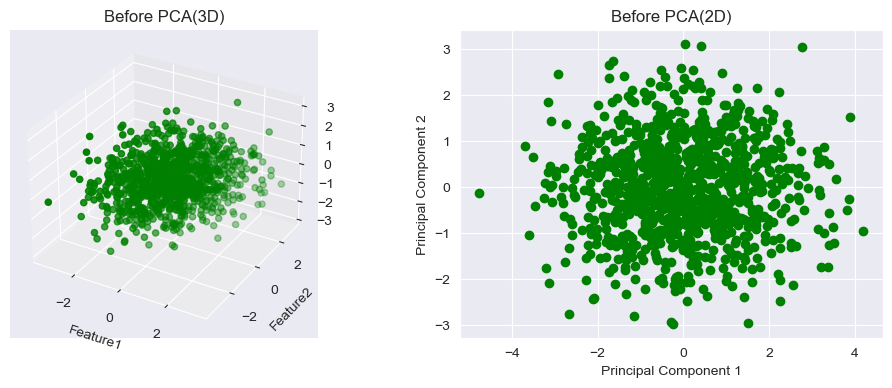

In [18]:
#转换前的3维数据可视化

X=X_standardized
# 创建一个新的图形窗口，设置画布尺寸为12英寸（宽）×4英寸（高）
# figsize参数控制图形的物理大小，适合需要横向对比子图的场景
fig = plt.figure(figsize=(12,4))

# 在画布上创建第一个子图（1行2列网格中的第1个位置），并指定为3D投影
# 121表示1行2列的第1个子图，projection='3d'启用三维坐标系
ax1 = fig.add_subplot(121,projection='3d')
# 在ax1子图中绘制3D散点图：
# X[:,0]表示取所有行的第0列作为x轴数据
# X[:,1]表示取所有行的第1列作为y轴数据
# X[:,2]表示取所有行的第2列作为z轴数据
# c='g'设置散点颜色为绿色（green的缩写）
ax1.scatter(X[:,0],X[:,1],X[:,2],c='g')
# 设置子图标题为'Before PCA(3D)'，表示这是PCA降维前的三维原始数据
ax1.set_title('Before PCA(3D)')
ax1.set_xlabel('Feature1')
ax1.set_ylabel('Feature2')

#pca降维： 3维降维2维
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

#转化后的2维数据可视化

# 在画布上创建第一个子图（1行2列网格中的第1个位置）
# 121表示1行2列的第2个子图，projection='3d'启用二维坐标系
ax1 = fig.add_subplot(122)
# 在ax1子图中绘制3D散点图：
# X[:,0]表示取所有行的第0列作为x轴数据
# X[:,1]表示取所有行的第1列作为y轴数据
# c='g'设置散点颜色为绿色（green的缩写）
ax1.scatter(X_pca[:,0],X_pca[:,1],c='g')
# 设置子图标题为'Before PCA(3D)'，表示这是PCA降维前的三维原始数据
ax1.set_title('Before PCA(2D)')
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
plt.show()

#结论说明：：
# 1. 下面展示的二维图的“Principal Component 2”维度是-4 到 4；
# 2. 三维的展示就是在二维的xy坐标上做了45度的转向；
# 3. 最终我们需要的就是找到 component1 component2 的两个主要成分